# 앙상블 기법

In [3]:
# 배깅 앙상블

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, Y = make_moons(n_samples=500, noise=0.25, random_state=3)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=42)

bag_clf = BaggingClassifier (
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)
bag_clf.fit(X_train, Y_train)
Y_pred = bag_clf.predict(X_test)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
df_Y_pred = dt_clf.predict(X_test)

In [5]:
# oob 평가

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True
)

bag_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [7]:
bag_clf.oob_score_

0.936

In [8]:
from sklearn.metrics import accuracy_score

Y_pred = bag_clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.904

In [12]:
# oob 트리 결정경계 시각화

from sklearn.tree import DecisionTreeClassifier

Xm, Ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, stratify=Ym, random_state=42)

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, Ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

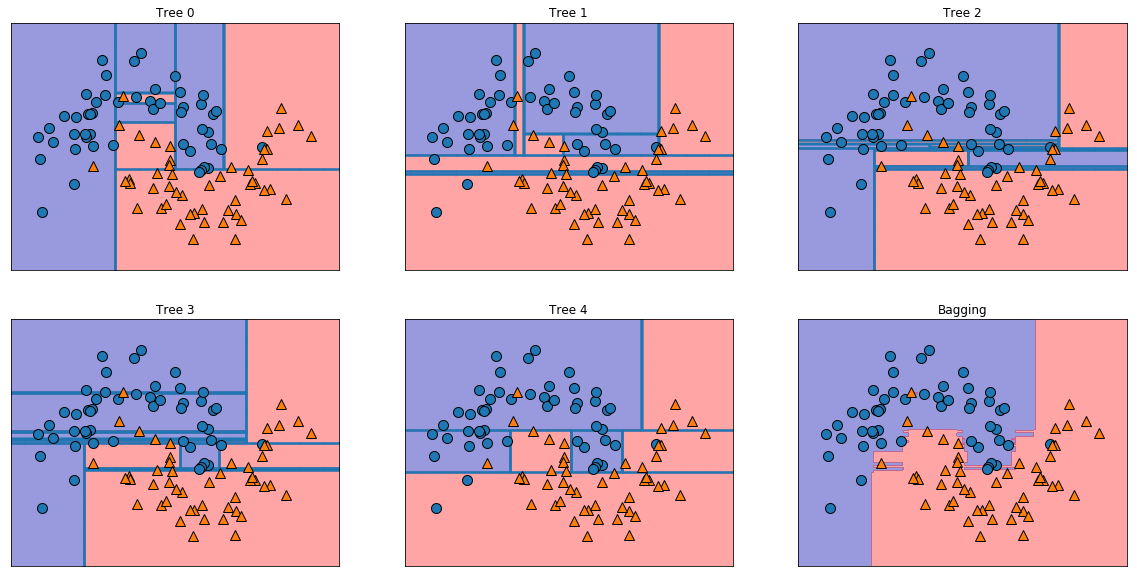

In [11]:
import matplotlib.pyplot as plt
import mglearn # 나는 안깔려있어서 깔아줬음

flg, axes = plt.subplots(2, 3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)) :
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, Ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], Ym)
plt.show()

In [20]:
# 랜덤 포레스트로 시각화

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, max_features=1, random_state=3)
forest.fit(Xm_train, Ym_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

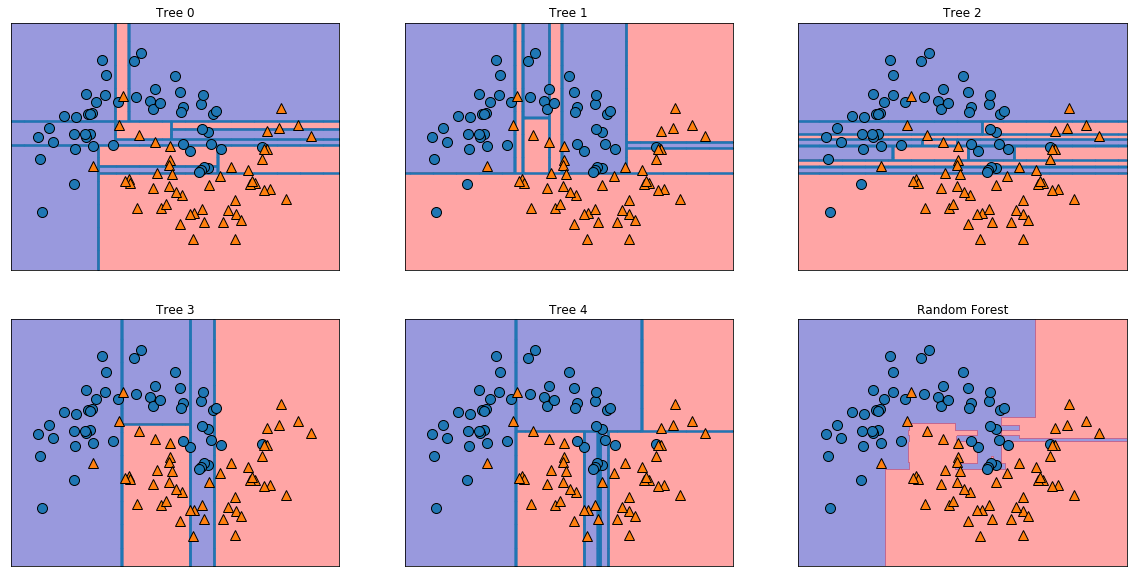

In [21]:
flg, axes = plt.subplots(2, 3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)) :
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, Ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], Ym)
plt.show()

In [14]:
# Random Forest

from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_) :
    print(name, "-", importance)

sepal length (cm) - 0.10612761987750428
sepal width (cm) - 0.02167809317736852
petal length (cm) - 0.4361295069034437
petal width (cm) - 0.43606478004168353


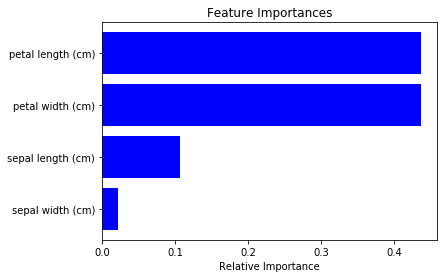

In [15]:
# 각 Feature 들의 중요도를 알려준다.

import numpy as np

features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [80]:
# 에이다 부스트 - 의사결정 스텀프 데이터 생성
import numpy as np

def loadSimpData() :
    datMat = matrix([[1., 2.1], [1.5, 1.6], [1.3, 1.], [1., 1.], [2., 1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat, classLabels

datMat, classLabels = loadSimpData()

In [76]:
datMat

matrix([[1. , 2.1],
        [1.5, 1.6],
        [1.3, 1. ],
        [1. , 1. ],
        [2. , 1. ]])

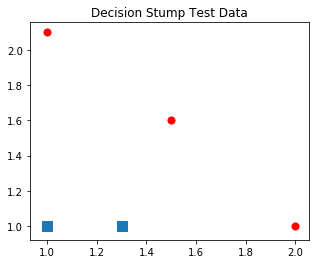

In [81]:
# 기본 시각화 세팅

xcord0 = []
xcord1 = []
ycord0 = []
ycord1 = []

for i in range(len(classLabels)) :
    if classLabels[i] == 1.0 :
        xcord1.append(datMat[i,0]), ycord1.append(datMat[i,1])
    else :
        xcord0.append(datMat[i,0]), ycord0.append(datMat[i,1])
        
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
ax.scatter(xcord0, ycord0, marker='s', s=90)
ax.scatter(xcord1, ycord1, marker='o', s=50, c='red')
plt.title("Decision Stump Test Data")
plt.show()

In [82]:
def stumpClassify(dataMatrix, dimen, threshVal, threshineq) :
    retArray = ones((shape(dataMatrix)[0], 1))
    
    # 분류값 부등호에 준하지 못하는 값을 -1로 하나씩 뺀다.
    if threshineq == 'It' :
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else :    
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    return retArray    

In [86]:
def buildStump(dataArr, classLabels, D) :
    dataMatrix = mat(dataArr)
    labelMat = mat(classLabels).T
    m,n = shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = mat(zeros((m, 1)))
    minError = inf # minError 가 +무한대로 가게 설정
    
    for i in range(n) : # 모든 속성 반복
        rangeMin = dataMatrix[:, i].min()
        rangeMax = dataMatrix[:, i].max()
        stepSize = (rangeMax - rangeMin) / numSteps # 전체 실행 횟수만큼 range 차이를 나누면 가중치 단위가 나옴
        
        for j in range(-1, int(numSteps)+1) : # 실행 횟수번까지,
            for inequal in ['lt', 'gt'] : # less than, greater than 을 각각 나타내고자함
                threshVal = (rangeMin + float(j) * stepSize) # 각각의 가중치를 최소값에 더하면서 축적해감
                # stump 분류기를 i, j, lessthan 으로 호출
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                errArr = mat(ones((m, 1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr # D로 곱해지는 토탈 에러 계산
                print("split : dim %d, thresh %.2f , thresh inequal : %s, the weighted error is %.3f"
                      % (i, threshVal, inequal, weightedError))
                
                if weightedError < minError : 
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [88]:
D = mat(ones((5,1)) / 5)
buildStump(datMat, classLabels, D)

split : dim 0, thresh 0.90 , thresh inequal : lt, the weighted error is 0.600
split : dim 0, thresh 0.90 , thresh inequal : gt, the weighted error is 0.600
split : dim 0, thresh 1.00 , thresh inequal : lt, the weighted error is 0.600
split : dim 0, thresh 1.00 , thresh inequal : gt, the weighted error is 0.600
split : dim 0, thresh 1.10 , thresh inequal : lt, the weighted error is 0.600
split : dim 0, thresh 1.10 , thresh inequal : gt, the weighted error is 0.600
split : dim 0, thresh 1.20 , thresh inequal : lt, the weighted error is 0.600
split : dim 0, thresh 1.20 , thresh inequal : gt, the weighted error is 0.600
split : dim 0, thresh 1.30 , thresh inequal : lt, the weighted error is 0.800
split : dim 0, thresh 1.30 , thresh inequal : gt, the weighted error is 0.800
split : dim 0, thresh 1.40 , thresh inequal : lt, the weighted error is 0.800
split : dim 0, thresh 1.40 , thresh inequal : gt, the weighted error is 0.800
split : dim 0, thresh 1.50 , thresh inequal : lt, the weighted e

({'dim': 0, 'thresh': 2.0, 'ineq': 'lt'}, matrix([[0.4]]), array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [72]:
# 의사결정 스텀프로 에이다부스트 학습 구현

def adaBoostTrainDS(dataArr, classLabels, numlt=40) :
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m, 1)) / m)  # D를 전부 동일하게 초기화함
    aggClassEst = mat(zeros((m, 1)))
    
    for i in range(numlt) :
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        print("D : {}".format(D.T))
        # calc alpha, throw in max(error, eps) to account for error = 0
        alpha = float(0.5 * log((1.0 - error) / max(error, 1e-16)))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump) # stump params 를 배열에 저장
        print("classEst : {}".format(classEst.T))
        # exponent for 0 calc, getting messy
        expon = multiply(-1 * alpha * mat(classLabels).T, classEst)
        D = multiply(D, exp(expon)) # calc new  for next iteration
        D = D / D.sum()
        
        # calc training error of all classifiers
        # if this is 0, quit for loop early (use break)
        aggClassEst += alpha * classEst
        print("aggClassEst : {}".format(aggClassEst.T))
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T, ones((m, 1)))
        errorRate = aggErrors.sum() / m
        print("Total Error : {}".format(errorRate))
        
        if errorRate == 0.0 : break
    return weakClassArr

In [73]:
adaBoostTrainDS(datMat, classLabels, 9)

split : dim 0, thresh 0.9, thresh inequal : lt, the weighted error is [[0.6]]
split : dim 0, thresh 0.9, thresh inequal : gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.0, thresh inequal : lt, the weighted error is [[0.6]]
split : dim 0, thresh 1.0, thresh inequal : gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.1, thresh inequal : lt, the weighted error is [[0.6]]
split : dim 0, thresh 1.1, thresh inequal : gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.2, thresh inequal : lt, the weighted error is [[0.6]]
split : dim 0, thresh 1.2, thresh inequal : gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.3, thresh inequal : lt, the weighted error is [[0.8]]
split : dim 0, thresh 1.3, thresh inequal : gt, the weighted error is [[0.8]]
split : dim 0, thresh 1.4, thresh inequal : lt, the weighted error is [[0.8]]
split : dim 0, thresh 1.4, thresh inequal : gt, the weighted error is [[0.8]]
split : dim 0, thresh 1.5, thresh inequal : lt, the weighted err

[{'dim': 0, 'thresh': 2.0, 'ineq': 'lt', 'alpha': 0.2027325540540821},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'lt', 'alpha': 1.1102230246251564e-16},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.0},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.0},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.0},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.0},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.0},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.0},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.0}]

In [74]:
def adaClassify(datToClass, classifierArr) :
    # do stuff similar to last aggClassEst in adaBoostTrainDS
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m, 1)))
    
    for i in range(len(classifierArr)) : 
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'],
                                classifierArr[i]['thresh'],
                                classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha'] * classEst
        print(aggClassEst)
    return sign(aggClassEst) # sign 함수 : -1 or 1로 변환

classifierArr = adaBoostTrainDS(datMat, classLabels, 30)

adaClassify([0,0], classifierArr)

split : dim 0, thresh 0.9, thresh inequal : lt, the weighted error is [[0.6]]
split : dim 0, thresh 0.9, thresh inequal : gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.0, thresh inequal : lt, the weighted error is [[0.6]]
split : dim 0, thresh 1.0, thresh inequal : gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.1, thresh inequal : lt, the weighted error is [[0.6]]
split : dim 0, thresh 1.1, thresh inequal : gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.2, thresh inequal : lt, the weighted error is [[0.6]]
split : dim 0, thresh 1.2, thresh inequal : gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.3, thresh inequal : lt, the weighted error is [[0.8]]
split : dim 0, thresh 1.3, thresh inequal : gt, the weighted error is [[0.8]]
split : dim 0, thresh 1.4, thresh inequal : lt, the weighted error is [[0.8]]
split : dim 0, thresh 1.4, thresh inequal : gt, the weighted error is [[0.8]]
split : dim 0, thresh 1.5, thresh inequal : lt, the weighted err

split : dim 1, thresh 1.44, thresh inequal : gt, the weighted error is [[0.83333333]]
split : dim 1, thresh 1.55, thresh inequal : lt, the weighted error is [[0.83333333]]
split : dim 1, thresh 1.55, thresh inequal : gt, the weighted error is [[0.83333333]]
split : dim 1, thresh 1.6600000000000001, thresh inequal : lt, the weighted error is [[0.66666667]]
split : dim 1, thresh 1.6600000000000001, thresh inequal : gt, the weighted error is [[0.66666667]]
split : dim 1, thresh 1.77, thresh inequal : lt, the weighted error is [[0.66666667]]
split : dim 1, thresh 1.77, thresh inequal : gt, the weighted error is [[0.66666667]]
split : dim 1, thresh 1.8800000000000001, thresh inequal : lt, the weighted error is [[0.66666667]]
split : dim 1, thresh 1.8800000000000001, thresh inequal : gt, the weighted error is [[0.66666667]]
split : dim 1, thresh 1.9900000000000002, thresh inequal : lt, the weighted error is [[0.66666667]]
split : dim 1, thresh 1.9900000000000002, thresh inequal : gt, the wei

matrix([[1.]])